# Multivariate Source Use Case (Single DataFrameCase)

In this vignette I will represent a use case of the Source Multivariate Entropy Triangle with some individual Databases

### Importing Libraries

As the functions for the entopies measures are stored in other domain, first we will need to access those modules with the functions and the import all the necessary functions

In [23]:
# Bring your packages onto the path
import sys,os
sys.path.append(os.path.abspath(os.path.join('..'))) #'entropytriangle main directory

In [24]:
from entropytriangle import * #importing all modules necessary for the plotting

### Dowloading a set of Databases

In [25]:
#df = pd.read_csv('Arthritis.csv',delimiter=',',index_col='Unnamed: 0').drop(['ID'],axis = 1)
df = pd.read_csv('Breast_data.csv',delimiter=',',index_col='Unnamed: 0').drop(['Sample code number'],axis = 1).replace('?',np.nan) # in this DB the missing values are represented as '?' 
#df = pd.read_csv('Glass.csv',delimiter=',')
#df = pd.read_csv('Ionosphere.csv',delimiter=',')
#df = pd.read_csv('Iris.csv',delimiter=',',index_col='Id')
#df = pd.read_csv('Wine.csv',delimiter=',').drop(['Wine'],axis = 1)

In [26]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 10 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    683 non-null float64
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null object
dtypes: float64(1), int64(8), object(1)
memory usage: 60.1+ KB


In [27]:
df.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
1,5,1,1,1,2,1.0,3,1,1,benign
2,5,4,4,5,7,10.0,3,2,1,benign
3,3,1,1,1,2,2.0,3,1,1,benign
4,6,8,8,1,3,4.0,3,7,1,benign
5,4,1,1,3,2,1.0,3,1,1,benign
6,8,10,10,8,7,10.0,9,7,1,malignant
7,1,1,1,1,2,10.0,3,1,1,benign
8,2,1,2,1,2,1.0,3,1,1,benign
9,2,1,1,1,2,1.0,1,1,5,benign
10,4,2,1,1,2,1.0,2,1,1,benign


### Discretizing the Data before entropy calculation

We have defined a function for discretizing a hole dataset, the function divides de entries in 
"NROWS(DF)^(1/3)" equally sized spaces, and turn the data types in "categories"

In [28]:
df = discretization(df)

/Users/jaime.de.los.rios/Documents/GitHub/entropytriangle/entropytriangle/auxfunc.py:35: UserWarning: Discretizing data!
  warning("Discretizing data!")


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1 to 699
Data columns (total 10 columns):
Clump Thickness                699 non-null category
Uniformity of Cell Size        699 non-null category
Uniformity of Cell Shape       699 non-null category
Marginal Adhesion              699 non-null category
Single Epithelial Cell Size    699 non-null category
Bare Nuclei                    683 non-null category
Bland Chromatin                699 non-null category
Normal Nucleoli                699 non-null category
Mitoses                        699 non-null category
Class                          699 non-null category
dtypes: category(10)
memory usage: 15.8 KB


In [30]:
df.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
1,3,0,0,0,0,0.0,1,0,0,0
2,3,2,2,3,5,7.0,1,0,0,0
3,1,0,0,0,0,0.0,1,0,0,0
4,4,6,6,0,1,2.0,1,5,0,0
5,2,0,0,1,0,0.0,1,0,0,0
6,6,7,7,6,5,7.0,7,5,0,1
7,0,0,0,0,0,7.0,1,0,0,0
8,0,0,0,0,0,0.0,1,0,0,0
9,0,0,0,0,0,0.0,0,0,3,0
10,2,0,0,0,0,0.0,0,0,0,0


### Source Entropies Measures calculation

Once we have our data discretized, we will start by calculating the values of the entropies for the posterior plots 

In [31]:
'''
As the database is previosly discretized we won´t need the values of the bins
'Type variable select the entropy calculation:'
    Total: Total source entropy decomposition (CPx)
    Dual : Dual source entropy decomposition (DPx instead of CPx)
'''

edf = sentropies(df , type = 'total' , base = 2) 

In [32]:
edf

,H_Uxi,H_Pxi,DeltaH_Pxi,M_Pxi,VI_Pxi
Name,,,,,
Clump Thickness,3.000000,2.736921,0.263079,1.700498,1.036423
Uniformity of Cell Size,3.000000,1.995827,1.004173,1.919573,0.076254
Uniformity of Cell Shape,3.000000,2.099060,0.900940,1.888126,0.210933
Marginal Adhesion,3.000000,1.799080,1.200920,1.638452,0.160628
Single Epithelial Cell Size,3.000000,1.963974,1.036026,1.832804,0.131170
Bare Nuclei,3.169925,1.691657,1.478268,1.505832,0.185825
Bland Chromatin,3.000000,2.270245,0.729755,1.787030,0.483215
Normal Nucleoli,3.000000,1.701462,1.298538,1.645996,0.055466
Mitoses,3.000000,0.833258,2.166742,0.807694,0.025564


### Source Entropies Entropy Triangle Plotting

The last step will be plotting the values calculated previously. The coordinates will be calculated multiplying the normalized values needed by the scale used for plotting the triangle, and will appear behind the triangle plot for comparission

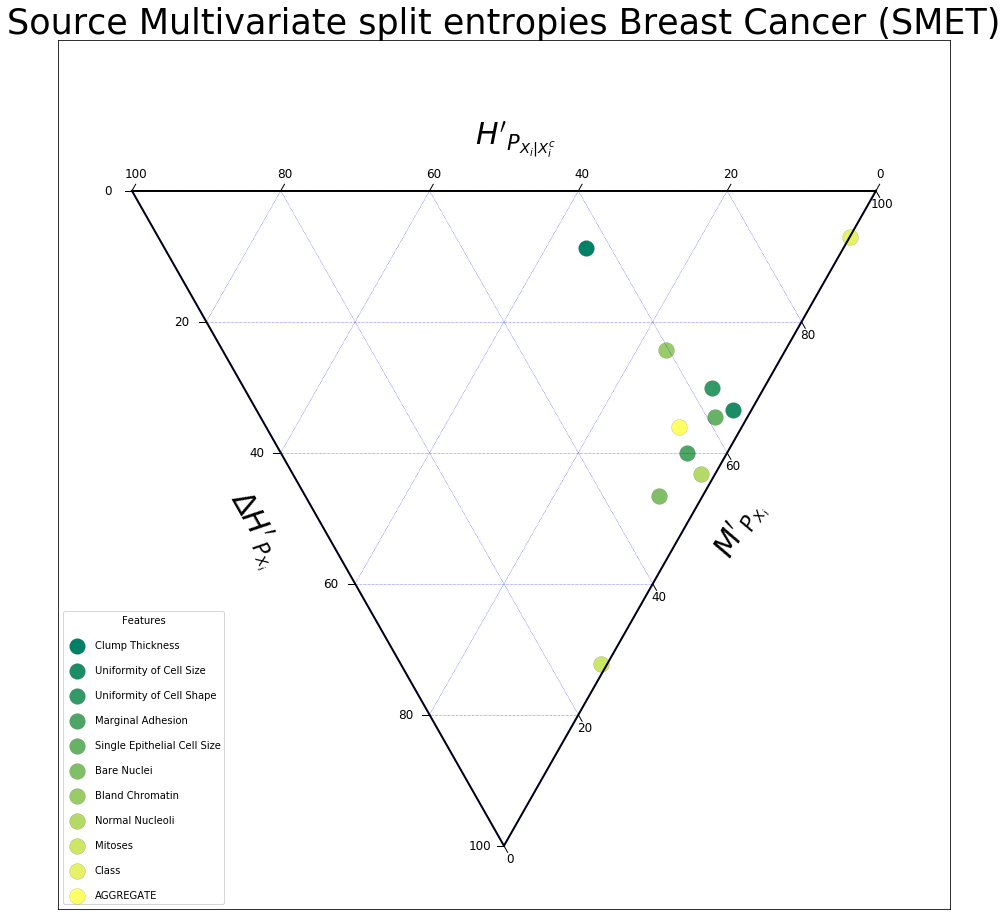

In [34]:
entriangle(edf,s_mk=250,scale= 100, pltscale=16 , ticks_size=12, gridl = 20, chart_title = "Source Multivariate split entropies Breast Cancer (SMET)")